# 1.1 Overview of features and relation to target

In [44]:
import os
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set()


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

In [2]:
# setting the number of cross validations used in the Model part 
nr_cv = 6

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'revenue_log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.1    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1


In [3]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [4]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [5]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

# shape, info, head and describe

In [6]:
df_train = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Restaurant_Revenue_Prediction\train.csv")
df_test = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Restaurant_Revenue_Prediction\test.csv")

In [7]:
print(df_train.shape,'\n')
print(df_test.shape)

(137, 43) 

(100000, 42)


In [8]:
print(df_train.info)

<bound method DataFrame.info of       Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   4   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ..   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4   2   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2   3   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2   3   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2   

     P7

In [9]:
print(df_test.info)

<bound method DataFrame.info of           Id   Open Date            City  City Group Type  P1   P2   P3   P4  \
0          0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   
1          1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   
2          2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   
3          3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   
4          4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   
...      ...         ...             ...         ...  ...  ..  ...  ...  ...   
99995  99995  01/05/2000         Antalya       Other   FC   5  5.0  4.0  4.0   
99996  99996  07/18/2011           Niğde       Other   IL   1  2.0  4.0  3.0   
99997  99997  12/29/2012        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   
99998  99998  10/12/2013        İstanbul  Big Cities   FC  12  7.5  6.0  6.0   
99999  99999  10/05/2010        İstanbul  Big Cities   IL   2  5.0  4.0  4.0   

       

In [10]:
print(df_train.head())

   Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  P7  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   5   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   5   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   5   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   4  10   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   5   

   P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  P22  \
0   4   5    5    3    5  5.0    1    2    2    2    4    5    4    1    3   
1   5   5    5    1    5  5.0    0    0    0    0    0    3    2    1    3   
2   5   5    5    2    5  5.0    0    0    0    0    0    1    1    1    1   
3   8  10   10    8   10  7.5    6    4    9    3   12   20   12    6    1   
4   5   5    5    2    5  5.0    2    1    2    1    4    2    2    1    2   

   P23  P24  P25  P26  P27  P28  P29  P30  P

In [11]:
print(df_test.head())

   Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   2   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2   

   P7  P8  P9  P10  P11  P12  P13  P14  P15  P16  P17  P18  P19  P20  P21  \
0   5   4   5    5    5    3  4.0    0    0    0    2    0    5    5    3   
1   5   3   4    4    2    4  5.0    0    0    0    0    0    5    5    3   
2   5   4   4    5    4    5  5.0    0    0    0    0    0    5    5    5   
3   5   4   5    4    3    4  5.0    0    0    0    0    4    4    4    3   
4   5   4   5    4    3    5  4.0    0    0    0    0    0    1    5    3   

   P22  P23  P24  P25  P26  P27  P28  P29  P30  P3

In [12]:
print(df_train.describe())

               Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9         P10         P11  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     3.357664    5.423358    5.153285    5.445255    5.489051    3.262774   
std      2.134235    2.2968

In [13]:
print(df_test.describe())

                  Id             P1             P2             P3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       4.088030       4.428085       4.215325   
std     28867.657797       2.812963       1.428865       0.842161   
min         0.000000       1.000000       1.000000       0.000000   
25%     24999.750000       2.000000       3.750000       4.000000   
50%     49999.500000       3.000000       5.000000       4.000000   
75%     74999.250000       4.000000       5.000000       4.000000   
max     99999.000000      15.000000       7.500000       6.000000   

                  P4             P5             P6            P7  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean        4.396025       1.989590       2.881900       5.30051   
std         1.035827       1.065314       1.531429       2.17858   
min         2.000000       1.000000       1.000000       1.00000   
25%         4.000000       1.000000   

# The target variable : Distribution of SalePrice

Skewness: 2.793479


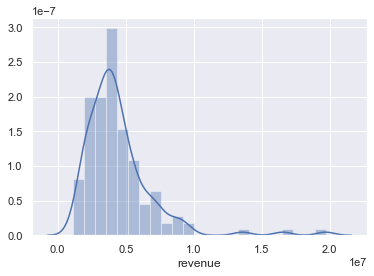

In [14]:
sns.distplot(df_train['revenue'])
print("Skewness: %f" % df_train['revenue'].skew())

skewness is 0.307402


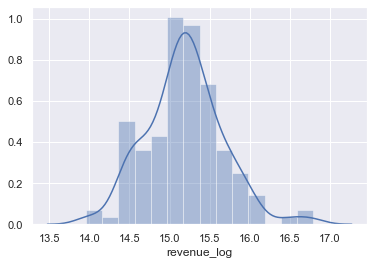

In [15]:
df_train['revenue_log'] = np.log(df_train['revenue'])
print("skewness is %f" %df_train['revenue_log'].skew())
sns.distplot(df_train['revenue_log'])
df_train.drop('revenue', axis = 1, inplace = True)

In [16]:
num_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(num_feats))
cat_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(cat_feats))

Number of Numerical features:  39
Number of Categorical features:  4


In [17]:
print(df_train[num_feats].columns)
print('\n',df_train[cat_feats].columns)

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue_log'],
      dtype='object')

 Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')


# List of features with missing values

In [18]:
df_train.isnull().sum()

Id             0
Open Date      0
City           0
City Group     0
Type           0
P1             0
P2             0
P3             0
P4             0
P5             0
P6             0
P7             0
P8             0
P9             0
P10            0
P11            0
P12            0
P13            0
P14            0
P15            0
P16            0
P17            0
P18            0
P19            0
P20            0
P21            0
P22            0
P23            0
P24            0
P25            0
P26            0
P27            0
P28            0
P29            0
P30            0
P31            0
P32            0
P33            0
P34            0
P35            0
P36            0
P37            0
revenue_log    0
dtype: int64

In [19]:
df_test.isnull().sum()    # as there are no null values in training and testing data, so no need for further process 
                          # of filling the nulll values

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

# Log Transform

In [20]:
for col in num_feats:
    print('{:6}'.format(col), 
          'Skewness: {:06.2f}'.format(df_train[col].skew()), 
          '   '
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt()))

Id     Skewness: 000.00    Kurtosis: -01.20
P1     Skewness: 001.84    Kurtosis: 002.58
P2     Skewness: 000.04    Kurtosis: 000.33
P3     Skewness: 000.15    Kurtosis: 002.57
P4     Skewness: 001.04    Kurtosis: 001.09
P5     Skewness: 002.41    Kurtosis: 008.27
P6     Skewness: 001.56    Kurtosis: 002.07
P7     Skewness: 000.67    Kurtosis: 000.81
P8     Skewness: 001.47    Kurtosis: 001.70
P9     Skewness: 001.73    Kurtosis: 001.66
P10    Skewness: 001.72    Kurtosis: 001.60
P11    Skewness: 001.32    Kurtosis: 002.28
P12    Skewness: 001.40    Kurtosis: 001.48
P13    Skewness: 001.16    Kurtosis: 001.16
P14    Skewness: 002.88    Kurtosis: 009.82
P15    Skewness: 002.01    Kurtosis: 003.82
P16    Skewness: 002.22    Kurtosis: 004.58
P17    Skewness: 003.45    Kurtosis: 017.31
P18    Skewness: 001.97    Kurtosis: 003.34
P19    Skewness: 002.50    Kurtosis: 005.87
P20    Skewness: 001.64    Kurtosis: 002.22
P21    Skewness: 002.73    Kurtosis: 011.10
P22    Skewness: 000.81    Kurto

Skewness: 1.562815
Kurtosis: 2.068578


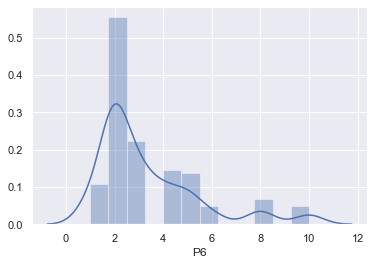

In [21]:
print('Skewness: %f' %df_train['P6'].skew())
print('Kurtosis: %f' %df_train['P6'].kurt())
sns.distplot(df_train['P6'])

In [22]:
df_train['P6_log'] = np.log(df_train['P6'])
df_train.drop('P6', inplace = True, axis = 1)

Skewness: 0.325072
Kurtosis: -0.239286


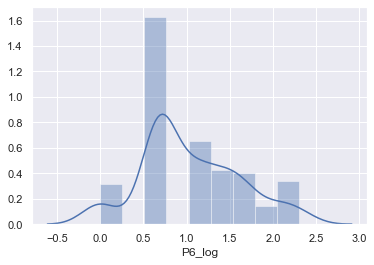

In [23]:
print('Skewness: %f' %df_train['P6_log'].skew())
print('Kurtosis: %f' %df_train['P6_log'].kurt())
sns.distplot(df_train['P6_log'])

Skewness: 1.403638
Kurtosis: 1.482848


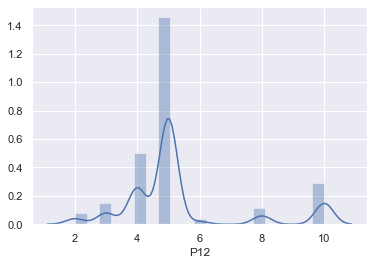

In [24]:
print('Skewness: %f' %df_train['P12'].skew())
print('Kurtosis: %f' %df_train['P12'].kurt())
sns.distplot(df_train['P12'])

In [25]:
df_train['P12_log'] = np.log(df_train['P12'])
df_train.drop('P12', inplace = True, axis = 1)

Skewness: 0.234112
Kurtosis: 1.273203


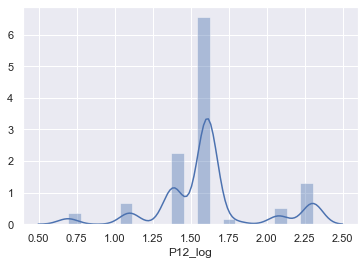

In [26]:
print('Skewness: %f' %df_train['P12_log'].skew())
print('Kurtosis: %f' %df_train['P12_log'].kurt())
sns.distplot(df_train['P12_log'])

# 1.2 Relation of features to target (revenue)

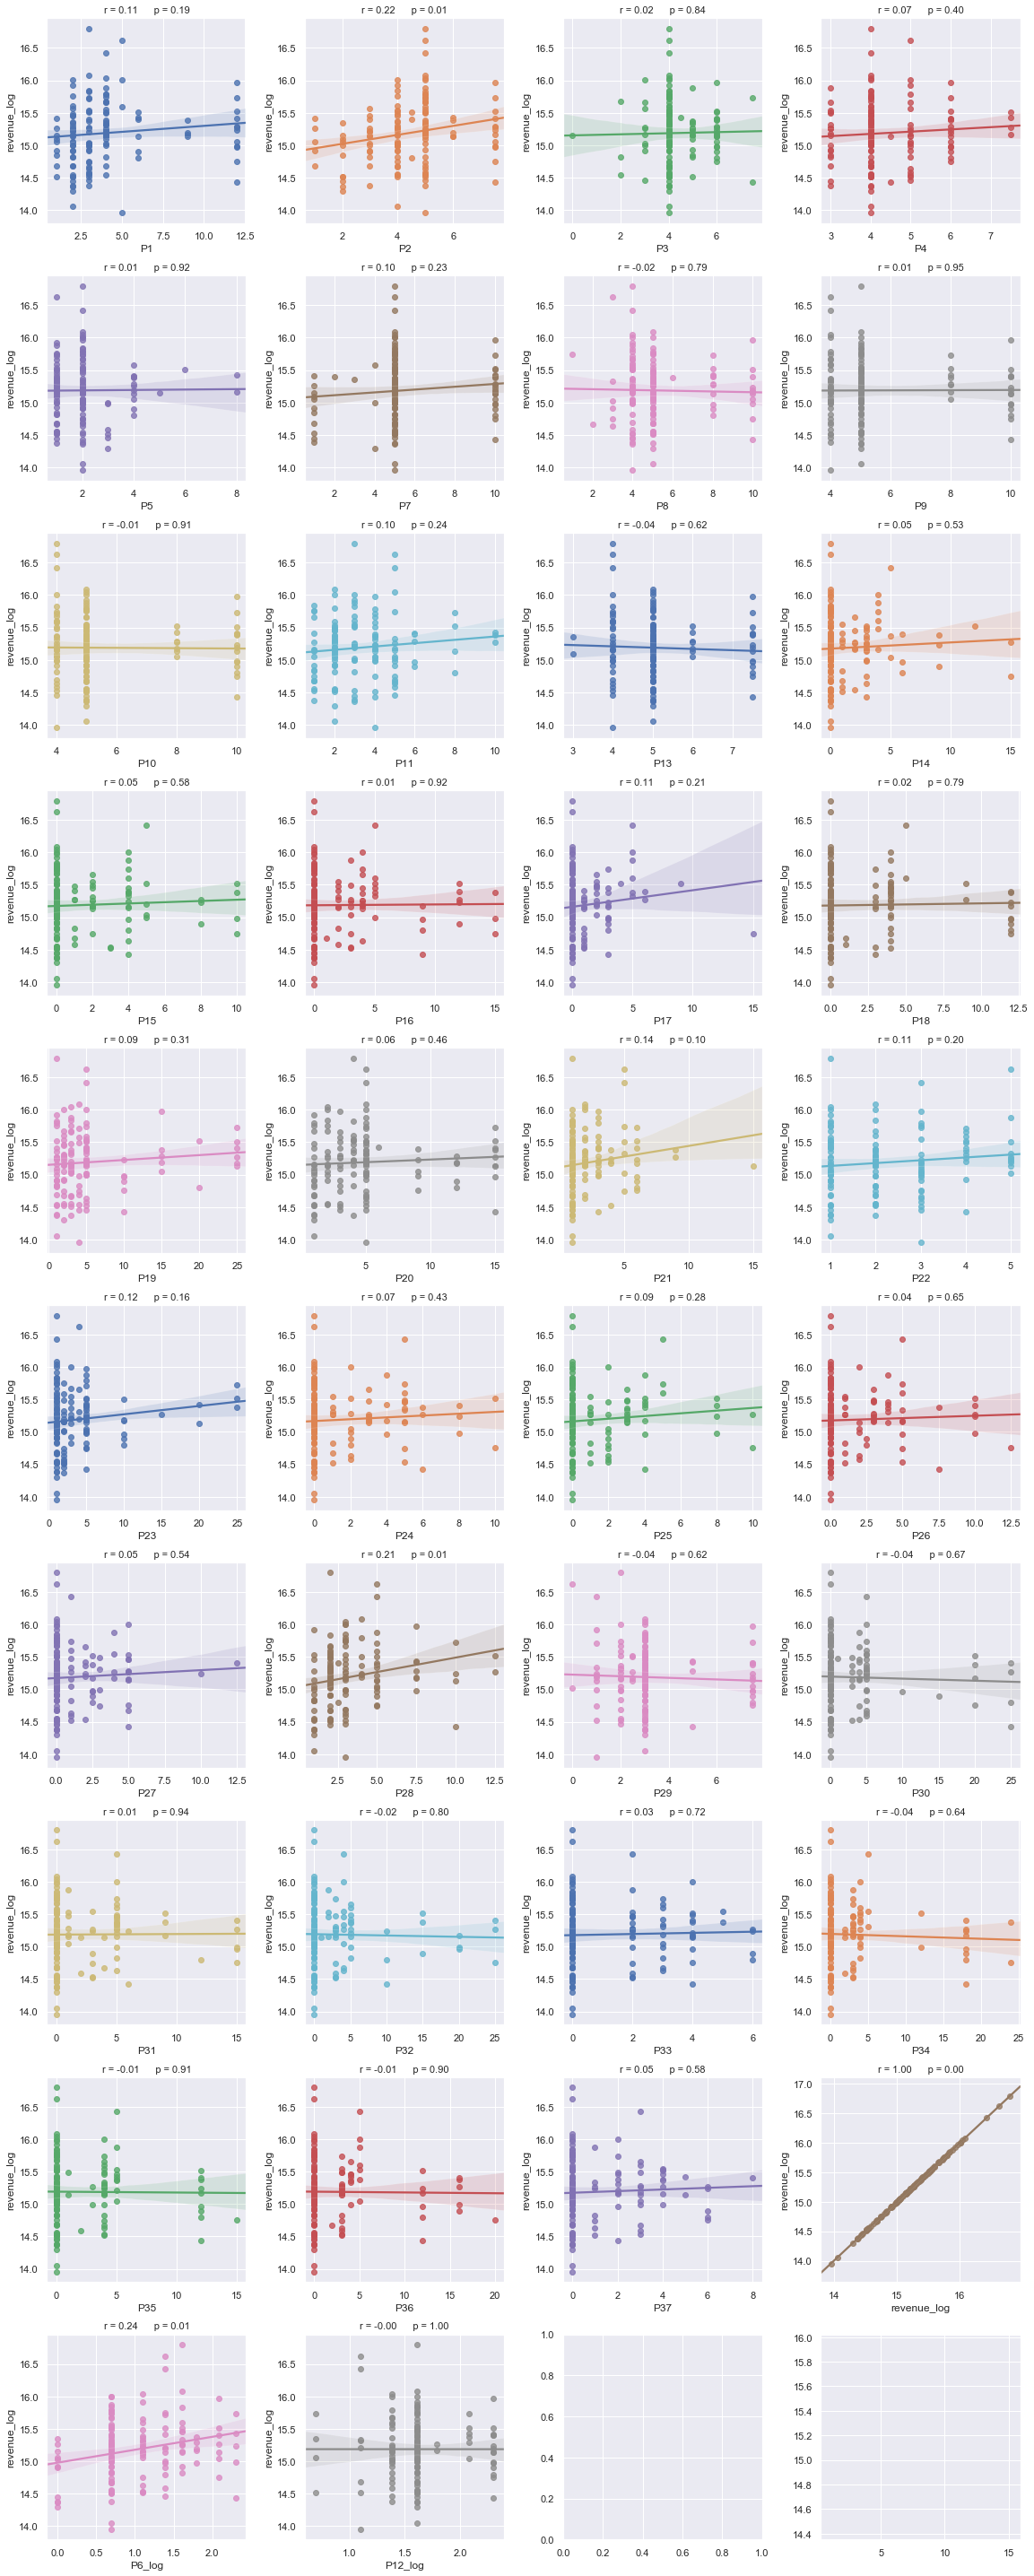

In [27]:
nr_rows = 10
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*4))

li_num_feats = list(num_feats)

log_param = ["P6_log", "P12_log"]
li_num_feats.extend(log_param)

li_not_plot = ['Id','revenue','revenue_Log','P6','P12']
li_plot_num_feats = [c for c in li_num_feats if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            
            #to print Pearson’s correlation coefficient(r) and p-value
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)          
            
plt.tight_layout()    
plt.show()   

# List of numerical features and their correlation coefficient to target

In [28]:
corr = df_train.corr()
corr_abs = corr.abs()
print(corr_abs,'\n')
print(len(df_train.columns),len(corr_abs))

                   Id        P1        P2        P3        P4        P5  \
Id           1.000000  0.026351  0.036991  0.025033  0.001914  0.010108   
P1           0.026351  1.000000  0.836671  0.695928  0.677941  0.302820   
P2           0.036991  0.836671  1.000000  0.473551  0.540322  0.203003   
P3           0.025033  0.695928  0.473551  1.000000  0.443606  0.168891   
P4           0.001914  0.677941  0.540322  0.443606  1.000000  0.715406   
P5           0.010108  0.302820  0.203003  0.168891  0.715406  1.000000   
P7           0.080977  0.853753  0.769842  0.651489  0.700482  0.446154   
P8           0.052129  0.760820  0.505116  0.689173  0.654594  0.447577   
P9           0.068655  0.765743  0.481635  0.741967  0.675336  0.465662   
P10          0.028977  0.795885  0.498135  0.764191  0.685416  0.462299   
P11          0.013573  0.542735  0.442719  0.417752  0.585285  0.435002   
P13          0.021536  0.708896  0.410924  0.697519  0.571611  0.380722   
P14          0.059383  0.

In [29]:
nr_num_cols = len(num_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]    # [target] gives reln betn just respective col and target
print(ser_corr,'\n')                                         # [target] if not used, it gives reln betn target and all columns

revenue_log    1.000000
P6_log         0.235632
P2             0.218221
P28            0.213542
P21            0.140226
P23            0.122095
P1             0.112199
P22            0.111167
P17            0.107812
P7             0.104001
P11            0.102064
P25            0.092395
P19            0.087267
P4             0.072821
P24            0.067645
P20            0.063429
P14            0.054250
P27            0.052368
P15            0.048033
P37            0.047089
P29            0.043341
P13            0.042842
P34            0.040258
P26            0.039676
P30            0.036667
P33            0.031044
P18            0.022811
P8             0.022511
P32            0.022275
Id             0.018713
P3             0.017881
P36            0.010433
P10            0.010060
P35            0.009450
P16            0.009137
P5             0.008286
P31            0.006211
P9             0.005269
P12_log        0.000253
Name: revenue_log, dtype: float64 



In [30]:
cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
print("List of numerical features with r above min_val_corr : ", cols_abv_corr_limit,'\n')
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)
print("List of numerical features with r below min_val_corr : ", cols_bel_corr_limit)

List of numerical features with r above min_val_corr :  ['revenue_log', 'P6_log', 'P2', 'P28', 'P21', 'P23', 'P1', 'P22', 'P17', 'P7', 'P11'] 

List of numerical features with r below min_val_corr :  ['P25', 'P19', 'P4', 'P24', 'P20', 'P14', 'P27', 'P15', 'P37', 'P29', 'P13', 'P34', 'P26', 'P30', 'P33', 'P18', 'P8', 'P32', 'Id', 'P3', 'P36', 'P10', 'P35', 'P16', 'P5', 'P31', 'P9', 'P12_log']


# List of categorical features and their unique values

In [31]:
for catg in list(cat_feats):
    print(df_train[catg].value_counts(),'\n')   #counts number of occurances of specific category

01/07/2000    2
02/02/2012    2
02/23/2010    2
01/03/2014    1
08/05/2013    1
             ..
11/12/2013    1
12/25/2009    1
02/09/2011    1
11/25/2008    1
05/04/2012    1
Name: Open Date, Length: 134, dtype: int64 

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Diyarbakır         3
Tekirdağ           3
Adana              3
Kayseri            3
Eskişehir          3
Konya              2
Aydın              2
Muğla              2
Trabzon            2
Tokat              1
Amasya             1
Afyonkarahisar     1
Kocaeli            1
Şanlıurfa          1
Kırklareli         1
Balıkesir          1
Elazığ             1
Kütahya            1
Denizli            1
Isparta            1
Uşak               1
Edirne             1
Osmaniye           1
Bolu               1
Gaziantep          1
Kastamonu          1
Karabük            1
Name: City, dtype: int64 

Big Cities    78
Other         59
Name

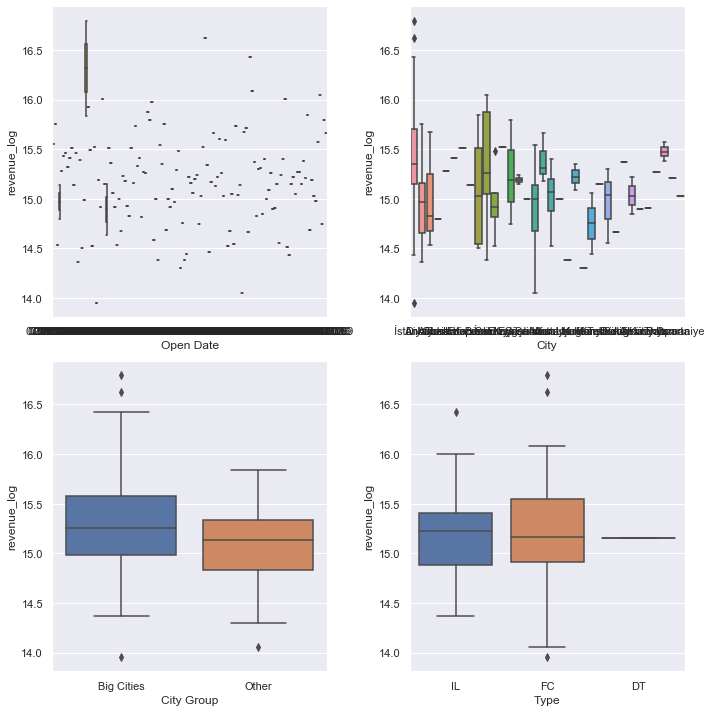

In [32]:
nr_rows = 2
nr_cols = 2
li_cat_feats = list(cat_feats)
fig, axs = plt.subplots(nr_rows, nr_cols, figsize = (nr_rows*5, nr_cols*5))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        l = r*nr_cols+c
        if l < len(li_cat_feats): 
            sns.boxplot(x = li_cat_feats[l], y = target, data = df_train, ax = axs[r][c])
            
plt.tight_layout()

# Features with largest correlation to revenue_Log

#Correlation matrix with r above min_val_corr

In [33]:
abv_feats = len(cols_abv_corr_limit)

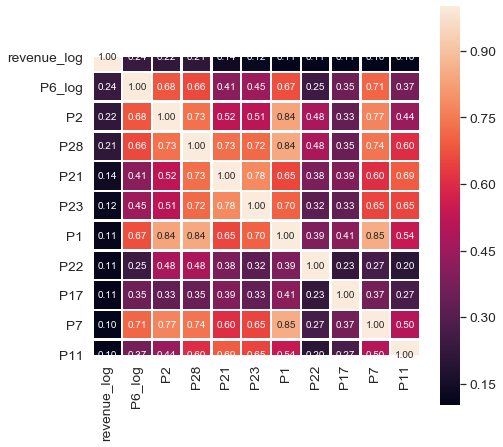

In [34]:
plot_corr_matrix(df_train, abv_feats, target)

#Correlation matrix of with r below min_val_corr

In [35]:
bel_feats = len(cols_bel_corr_limit)

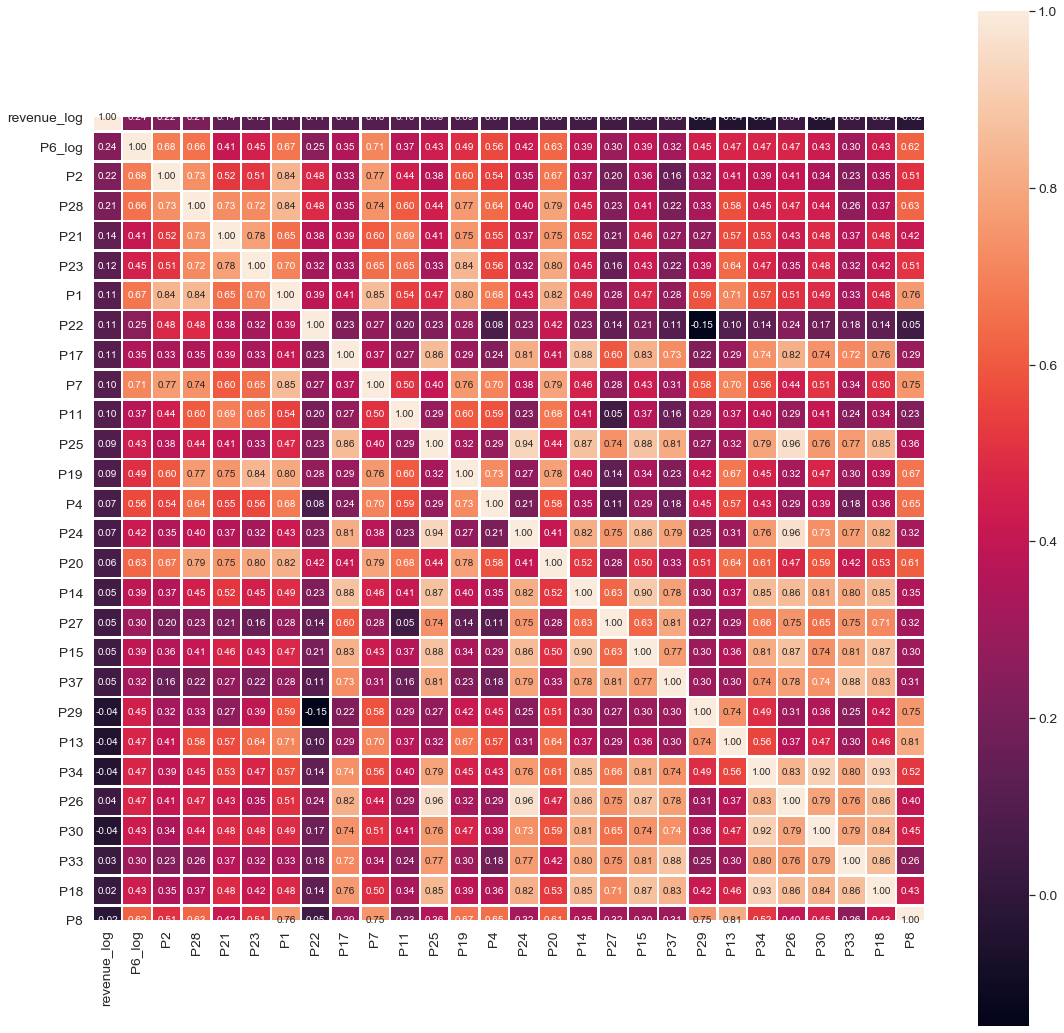

In [36]:
plot_corr_matrix(df_train, bel_feats, target)

# Training of dataset

In [37]:
data = df_train.select_dtypes(include=[np.number]).interpolate().dropna()

In [38]:
sum(data.isnull().sum() != 0)

0

In [39]:
y = np.log(df_train.revenue_log)
X = data.drop(['revenue_log', 'Id'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

# Building of linear model

In [41]:
linreg = LinearRegression()
linreg_model = linreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

R-Squared for Train set: 0.515
R-Squared for test set: -1.523


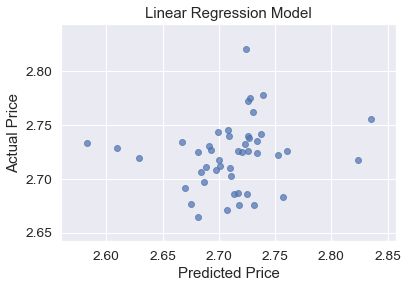

In [42]:
predictions = linreg_model.predict(X_test)
actual_values = y_test

plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

# Linear model using GridSearchCV

In [49]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs = GridSearchCV(linreg, parameters, cv=2, scoring='neg_mean_squared_error', verbose=2)
gsv_model = gs.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV] .. copy_X=True, fit_intercept=True, normalize=True, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV] .. copy_X=True, fit_intercept=True, normalize=True, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV] . copy_X=True, fit_intercept=True, normalize=False, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV] . copy_X=True, fit_intercept=True, normalize=False, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV] . copy_X=True, fit_intercept=False, normalize=True, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV] . copy_X=True, fit_intercept=False, normalize=True, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


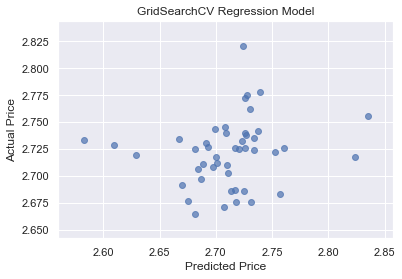

In [50]:
predictions = gsv_model.predict(X_test)
actual_values = y_test

plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('GridSearchCV Regression Model')
plt.show()